# EDA for a FATAL POLICE SHOOTINGS DATASET

### Data Source - 
https://data.world/data-society/fatal-police-shootings
https://github.com/washingtonpost/data-police-shootings

In [3]:
#Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Dataset 1 fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
#shape of the dataframe
df.shape

(7232, 17)

In [66]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

Here we see that the date attribute has object dtype instead of date time attribute.

In [68]:
#convert this to Datetime
df['date']= pd.to_datetime(df['date'])
df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [5]:
#check for null values
df.isnull()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7228,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7229,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
7230,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [6]:
 df.isnull().sum()

id                            0
name                        353
date                          0
manner_of_death               0
armed                       209
age                         409
gender                        7
race                       1287
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        640
body_camera                   0
longitude                   710
latitude                    710
is_geocoding_exact            0
dtype: int64

### Drop the name column because it won't be of any help for the analysis.

In [70]:
#we can drop the columns id and name as they are not relevant to our analysis also because name column has about 350 null values and imputing them won't be of any significance
police_shootings = df.drop(['name'],axis=1)
police_shootings.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [55]:
police_shootings.isnull().sum()

id                            0
date                          0
manner_of_death               0
armed                       209
age                         409
gender                        7
race                       1287
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        640
body_camera                   0
longitude                   710
latitude                    710
is_geocoding_exact            0
dtype: int64

From the final output the columns armed(209), age(409), gender(7), race(1287), flee(640) and the latitude and longitude(710) null values. 

In [33]:
#Lets figure out how the categories under the arms column

police_shootings.armed.value_counts()

gun                    4337
knife                  1046
unarmed                 441
vehicle                 260
undetermined            253
                       ... 
grenade                   1
contractor's level        1
pen                       1
car, knife and mace       1
bow and arrow             1
Name: armed, Length: 98, dtype: int64

In [34]:
police_shootings.race.value_counts()


W    4308
B    1593
H    1088
A     105
N      91
O      47
Name: race, dtype: int64

In [44]:
police_shootings.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,body_camera,longitude,latitude,is_geocoding_exact
0,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,False,-123.122,47.247,True
1,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,False,-122.892,45.487,True
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,False,-97.281,37.695,True
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,False,-122.422,37.763,True
4,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,False,-104.692,40.384,True


## Data Analysis

### Manner of Death

#### Percentage of 2 manners of death

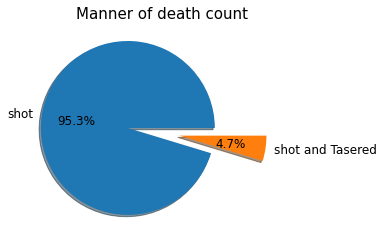

In [56]:
police_shootings.manner_of_death.value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=[0.4,0.2])
plt.title("Manner of death count",fontsize=15)
plt.ylabel('')
plt.show()

As per the pie chart the majority of the fatal killings were done by direct shooting while just the 4-5% shootings were where the victim was forst shot and then tasered.

#### Manner of death as per mental Illness

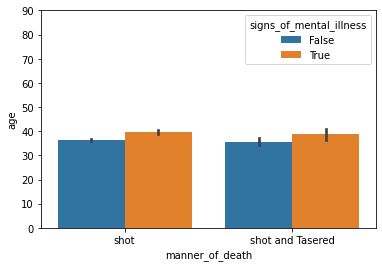

In [57]:
sns.barplot(x="manner_of_death", y="age",hue='signs_of_mental_illness',data=police_shootings)
plt.yticks(np.arange(0,100,10))
plt.show()


From the above plot we can generalize that the majority of (shooting & tasered) were on victims with mental illness. Between age *35-40* for only shot victims and *35-45* for victims that were shot and tasered. But we also see that there is not much of a difference in the deaths without signs of mental illness.

#### Manner of death, threat level and mental illness.

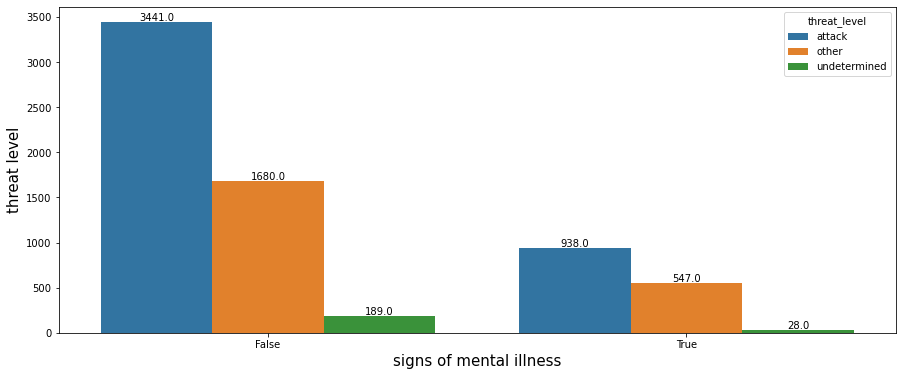

In [58]:
#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
plt.figure(figsize=(15,6))
ax = sns.barplot(x='signs_of_mental_illness',y='age',hue='threat_level',data=(police_shootings.groupby(['signs_of_mental_illness','threat_level'],as_index=False).age.count()))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('signs of mental illness',size=15)
plt.ylabel('threat level',size=15)
plt.show()

People with mental illness mostly attacked the officer more than other and undetermined categories.

#### Manner of death by Age and Gender

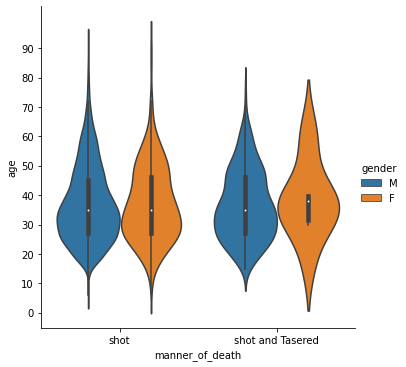

In [59]:
#references - https://www.geeksforgeeks.org/python-seaborn-catplot/
sns.catplot(x="manner_of_death", y="age",hue='gender', kind="violin",data=police_shootings)
plt.yticks(np.arange(0,100,10))
plt.show()

A Violin plot depicts the summary statistics and the density of each variable.

1.From the above plot what we observe is the median( white dots on the gray bar) for male victims is lower than the Female victims for shot and taserd category.
2.The thin shape at the ends  for Male and Female victims who were shot shows that the values are concentrated sround the median values that is around age 35.

#### Manner of Death by Age and Race

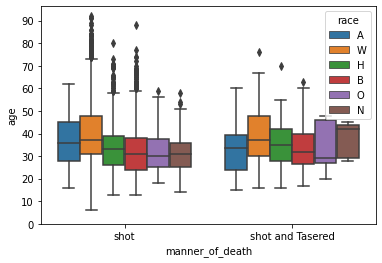

In [24]:
sns.boxplot(x="manner_of_death", y="age",hue='race',data=police_shootings)
plt.yticks(np.arange(0,100,10))
plt.show()

1.If we see the box plots and each race as a section then many victims were of similar age  at certain parts of the scale, but in other parts of the scale the ages are more variable.
2.The median value for Asian victims for shot and shot&tasered the median is in the middle and in the positive quartile respectively. 

There are a lot of outlier values because we have not altered the null values.

### Weapon used by the person that was shot.

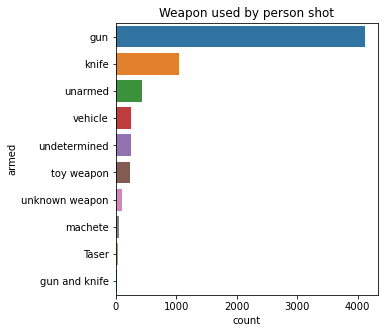

In [60]:
plt.figure(figsize=(4.7, 5))
ax = sns.countplot(y='armed', data=police_shootings,
                   order = police_shootings.armed.value_counts().iloc[:10].index)
plt.title('Weapon used by person shot')
plt.show()

From the above plot we can conclude that gun was the highest used weapon and baseball bat is the lowest, but as per the visible graph the least used is Taser.

#### Age bracket of the victims.

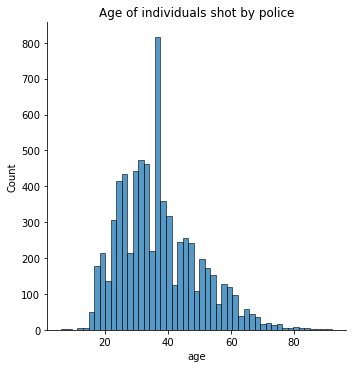

In [18]:
sns.displot(police_shootings.age[~np.isnan(police_shootings.age)])
plt.title('Age of individuals shot by police')
plt.show()

Most of the individuals shot and killed by police were between the ages of 20 and 40, with very few older than 80 or younger than 16. Though there are 17 children under the age of 16 that were killed by police.

##### Under age shootings .

In [108]:
police_shootings[police_shootings.age<16]


,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,body_camera,longitude,latitude,is_geocoding_exact
435,2015-06-14,shot,gun,15.0,M,W,Cocoa,FL,True,attack,False,-80.792,28.360,True
596,2015-08-09,shot,NaN,15.0,M,B,Indianapolis,IN,False,attack,False,-86.080,39.817,True
776,2015-10-15,shot,gun,15.0,M,H,Miami,FL,False,attack,False,-80.413,25.507,True
833,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,True,-92.050,31.125,True
1017,2016-01-11,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,False,-77.034,40.398,True
1297,2016-04-19,shot,gun,15.0,M,B,St. Louis,MO,False,attack,False,-90.219,38.654,True
1587,2016-08-09,shot,gun,14.0,M,H,Los Angeles,CA,False,attack,True,-118.215,34.038,True
1680,2016-09-14,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,False,-82.987,39.963,True
1849,2016-11-19,shot and Tasered,knife,15.0,M,A,Watsonville,CA,False,other,True,-121.791,36.971,True
2267,2017-04-24,shot,gun,15.0,M,B,Killeen,TX,False,attack,False,NaN,NaN,True


There were 25 shootings that were executed for under age 16.

### Plot police shootings by gender


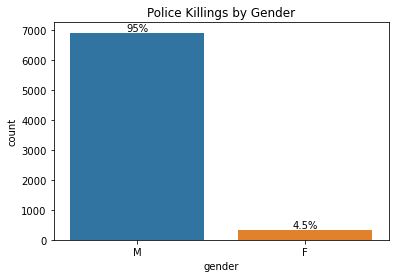

In [109]:
ax = sns.countplot(x = "gender", data = police_shootings,
                   order = police_shootings.gender.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(police_shootings)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Gender')
plt.show()

##### But the Gender Ratio in the United States in 2020 is 97.948 males per 100 females as per the records till 2020.
#Reference - https://statisticstimes.com/demographics/country/us-sex-ratio.php

In [122]:
#add reference
def ActualVsPopulation(df, pop, group):
    """Get dataframe with actual per-group percentage vs population group percentage"""
    d = {group: [], 'type': [], 'percent': []}
    tot_pop = float(sum(pop.values()))
    for g in police_shootings[group].dropna().unique(): #for each group

        # Actual percentages
        d[group].append(g)
        d['type'].append('Shootings')
        d['percent'].append(100*df[df[group]==g].id.count()/df.id.count())

        # Percentages if statistic followed population distribution
        d[group].append(g)
        d['type'].append('Population') #based on population percentage
        d['percent'].append(100*pop[g]/tot_pop)
        
    return pd.DataFrame(data=d)


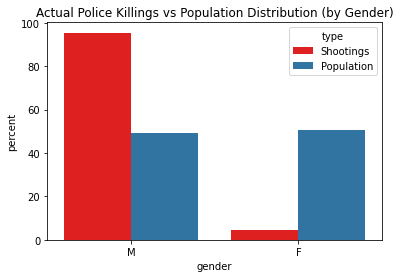

In [123]:
# Plot percent police killings by gender vs population percentages

pop_g = {'M': 49.2, 'F': 50.8} #percent population by gender https://www.census.gov/quickfacts/fact/table/US
df= ActualVsPopulation(police_shootings, pop_g, 'gender')
sns.barplot(x="gender", y="percent", hue="type", data=df, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by Gender)')
plt.show()


As per the above graph what we observe is even though the male population is less than the female population there were more male victims than female.

### Statewise comparison of killings.

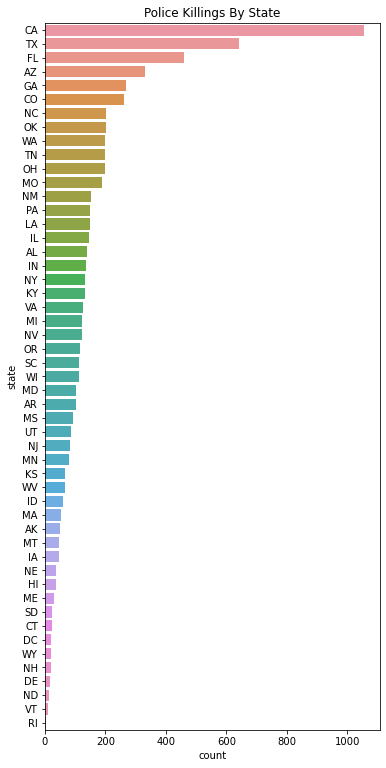

In [115]:
#using countplot
plt.figure(figsize=(6, 13))
sns.countplot(y="state", 
              data=police_shootings,
              order=police_shootings.state.value_counts().index)
plt.title('Police Killings By State')
plt.show()

From the above plot we conclude that California police has experienced the highest number of shootings.Rhode Island has the least number of shootings by the local police.

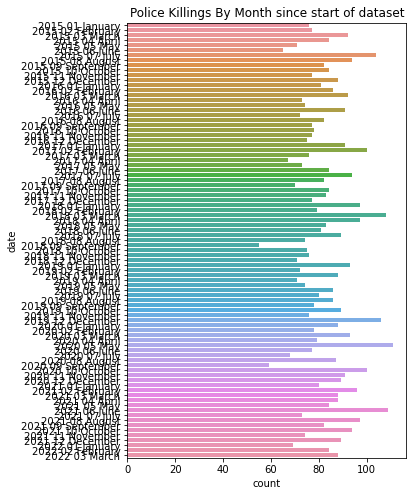

In [71]:
#Plot shootings by month
plt.figure(figsize=(5,8))
sns.countplot(y=police_shootings.date.dt.strftime('%Y %m %B'), 
              order=sorted(police_shootings.date.dt.strftime('%Y %m %B').unique()))
plt.title('Police Killings By Month since start of dataset')
plt.show()

### Police killings by race

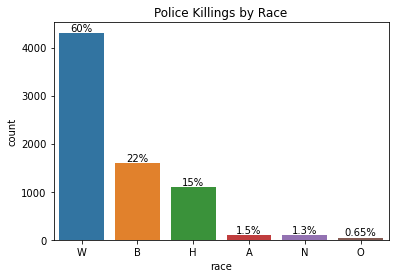

In [14]:
ax = sns.countplot(x="race", data=police_shootings,
                   order = police_shootings.race.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(police_shootings)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Race')
plt.show()

#### Police killings for every race for different states

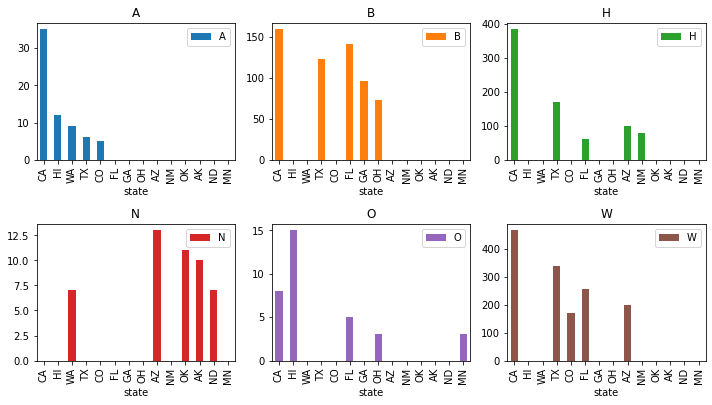

In [29]:
police_shootings.state.groupby(police_shootings['race']).value_counts().groupby(level=0).head(5).unstack(level=0).plot(kind='bar',subplots=True, layout=(3, 3),sharex=False, figsize=(10,8))
plt.tight_layout()

If we take the first few states in consideration we see that for the top 5 states.

1. A->Asian : California, Hawai, Washington State, Texas, colarado in descending order had number of Asians shot by the Police.
2. B->Black : California, Florida, Texas,Georgia and Ohio.
3. H->Hispanic : California has the highest hispanics shot and and florida has the least.
4. N->Native : Arizona, Oklahoma, Alaska, Washington State and North Dakota.
5. O->Others : Hawai, California, Florida, Minnesota and Ohio.
6. W->Whites : California, Texas, Florida, Arizona and Colarado.

This proves the above plot where statewise killings are plotted.

#### Police killings by every race for cities

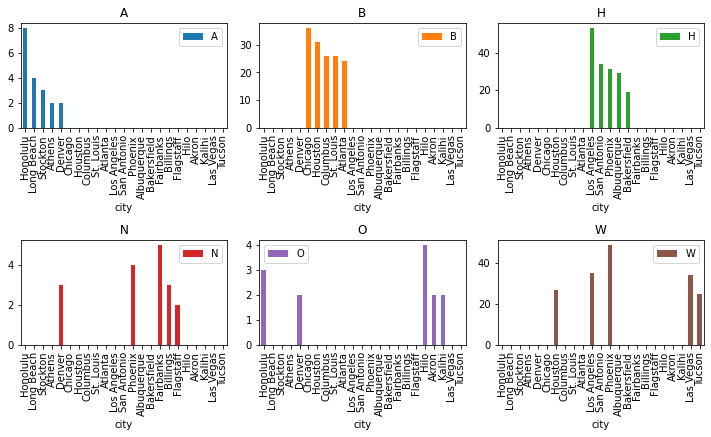

In [30]:
police_shootings.city.groupby(police_shootings['race']).value_counts().groupby(level=0).head(5).unstack(level=0).plot(kind='bar',
subplots=True, layout=(3, 3),sharex=False, figsize=(10,8))
plt.tight_layout()

 If we take the first few cities in consideration we see that for the top 5 cities.
 
 1. A->Asian :  Honolulu, Long Beach, Stockton, Athens/Denver in descending order of Asians shot by the Police.
 2. B->Black : Chicago, Houston,Columbus/St.Louis, Atlanta in descending order of Blacks shot by the Police.
 3. H->Hispanic : Los Angeles, San Antonio, Pheonix, Albuquer, Bershfield 
 4. N->Native :Fairbanks, Billings,Pheonix, Denver, Flagstaff.
 5. O->Others : Hawai, California, Florida, Minnesota and Ohio.
 6. W->Whites : Pheonix, Los Angeles, Las Vegas, Houston, Tucson.

Text(0.5, 1.0, 'Age distribution, by race')

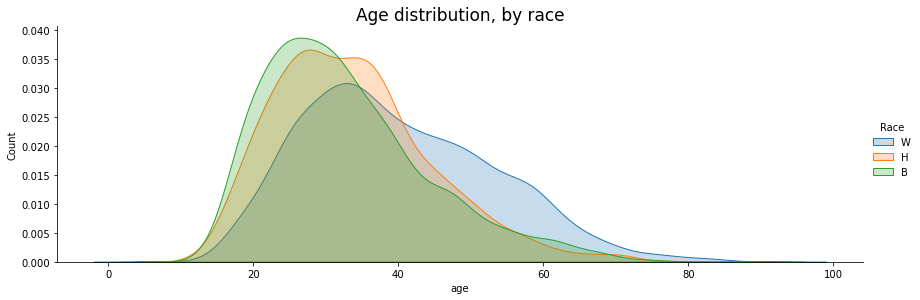

In [61]:
# Creating a dataframes for 3 races and compare their age graphs

three_races = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H")] 
g = sns.FacetGrid(data=three_races, hue="race", aspect=3, height=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

1. The shootings for Blacks have a peak age around 20-30.
2. The shootings for the Hispanics has a peak age around 20-25 and again 35-45.
3. The shootings for the White has a peak age around 40.

Surprisingly age groups above 60 were also among the victims in this.

### Signs of Mental Illness 

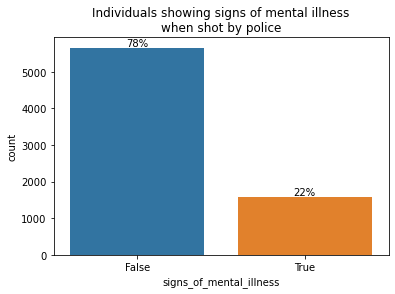

In [15]:
# Plot how many individuals showed signs of mental illness
ax = sns.countplot(x='signs_of_mental_illness', data=police_shootings)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(police_shootings)), (x.mean(), y), ha='center', va='bottom')
plt.title('Individuals showing signs of mental illness\nwhen shot by police')
plt.show()

Only 22% of the victims showed signs of Mental Illness.

### Let us study if the local police could record anything through their Body cams while the incidents took place.

#### If the police had body cameras on 

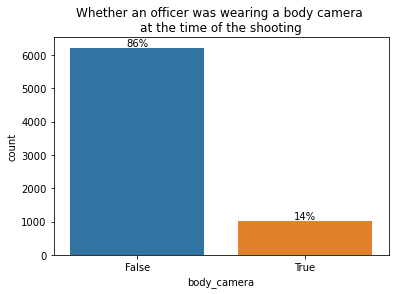

In [16]:
# Ploting how many shootings have body camera footage
ax = sns.countplot(x='body_camera', data=police_shootings)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(police_shootings)), (x.mean(), y), ha='center', va='bottom')
plt.title('Whether an officer was wearing a body camera \nat the time of the shooting')
plt.show()

If we take the overall dataset only 14% officers were wearing a body cam when the shootings took place.

#### Body camera usage per state

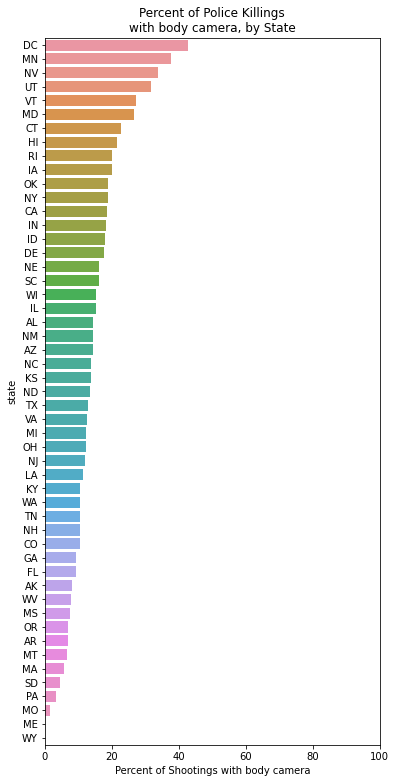

In [20]:
# Count the proportion of shootings w/ body camera by state
police_shootingsps = police_shootings.groupby('state').agg({'body_camera': 'mean'})

# Plot percent shootings w/ body camera by state
plt.figure(figsize=(6, 13))
sns.barplot(y=police_shootingsps.index, 
            x=100.*police_shootingsps.values.flatten(),
            order=police_shootingsps.body_camera.sort_values(ascending=False).index)
plt.title('Percent of Police Killings\nwith body camera, by State')
plt.xlabel('Percent of Shootings with body camera')
plt.xlim([0, 100])
plt.show()

The highest percentage of police killings with a body cam i.e.50% of the police officers in DC had a body cam on.

### One Final Analysis- were the victims on the run while they were shot or was it just a simple encounter?

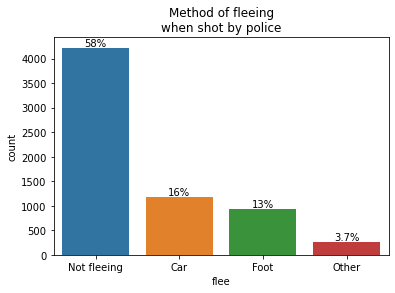

In [62]:
# Plot how many individuals were fleeing when shot
ax = sns.countplot(x='flee', data=police_shootings)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(police_shootings)), (x.mean(), y), ha='center', va='bottom')
plt.title('Method of fleeing\nwhen shot by police')
plt.show()


Almost 50% of the individuals were not fleeing when they were shot or Shot&tasered, 16% were fleeing in a car, 13% were on the run and around 4% of them had other tricks trying to get away.

### SOME CONCLUSIONS

1. We must now understand that having a body cam on makes sure that there is no wrong way or unwanted killings or shootings that are happening and every officer should have a body camera on them to record the incident for clear perspective.
2. As per our dataset the killings weren't based on racial differences.
3. Caliornia has had the highest number of killings/shootings.
4. Most number of victims had a gun with them when they were shot and they were not fleeing, shot in the non-moving state.

##### The shooting numbers in the USA have not decreased since the start of our dataset which is surprisingly sad and need an investigation for more specific reason than being armed or racial reasons.